1a) Explain the following terms with a few sentences and/or a simple diagram: (10 pts)
- Trade winds: the trade winds are a term used to describe East to West winds near the equator. Trade winds are caused by a combination of coriolis and Hadley Cell circulation. In the Southern Hemisphere, the trades blow towards the North-West, while the trades in the Northern Hemisphere blow towards the South-West.
- Hadley Circulation: Hadley circulation describes air circulation near the equator caused by Hadley cells. Essentially, air near the equator is often low-pressure and hot, caused by trade winds as well as more radiaton from the sun. This causes air to rise near the equator, where it then moves towards the poles at a high altitude, where it cools and descends before getting pushed back towards the equator.
- Walker Circulation: Walker circulation describes air circulation from the Americas eastwards across the Pacific. It is caused by cool zones on the West of the Americas causing air to be pushed East, aided by the trade winds, until it reaches warmer waters where it will rise, go West, and then fall, continuing the cycle.
- Bjerknes feedback: Bjerknes feedback is a positive warming feedback loop in the Pacific near the equator. When the SST in the central/eastern part of the Pacific rises. This causes the equatorial thermocline (temperature layering in the water) to deepen in the east and become shallower in the west. In turn, this causes the equatorial easterlies to weaken, which warms the SST in the central/eastern region, continuing the feedback loop.
- El Niño/La Niña: El Niño and La Niña are periods of particularly warm/cold temperatures (respectively) in the Pacific ocean along the equator. They last for about under a year, and occur somewhat irregularly El Niño causes water along the equatorial Pacific to warm, and La Niña causes unusually cold water in the eastern Pacific as well as colder water futher towards the west (although it should be noted that water is regularly warm in the west).

1b) What are the most prominent features of mean upper atmospheric (~10km) circulation. (5 pts)
The most prominent influences on upper atmospheric circulation are Hadley cells and subtropical jets. Hadley cells are cycles of circulation where air parcels near the equator rise, travel to the poles in the upper atmosphere (causing a lot of circulation), fall, and then travel back to the equator. Subtropical jets are caused by the intersection of Hadley cells and Ferrel cells (which are like Hadley cells, but further pole-ward).

---

2a) See El Nino Jupyter Notebook

2b) If El Nino/La Nina years are defined by when the SST anomaly is greater than 1oC 
(absolute value), which years from your plot are El Nino or La Niña years? Please choose 
2 years for both cases. Which event (La Niña or El Niño) corresponds to a positive SST 
anomaly and which one corresponds to a negative SST anomaly? (5 pts)

It appears in 1988 and in 2000, SST anomaly was less than -1, which means it would be a La Nina year.

It also appears in 1982/1983 and in 2016, SST anomaly was greater than 1, which means it would be an El Nino year.

---

3) 06_wind_n_pressure.ipynb and plot average wind and SST for January and July in the 
tropical Pacific. For SST, use the values in Problem 2 above (1981-2020 
HadISST_sst.nc). Describe the west-east SST gradient in the South Pacific and wind 
speed in both seasons (10 points).

---

In [1]:
import cartopy.crs as ccrs         # this code does not work in the notebook, ran it in separate python file
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

# Returns the name of a month, given its integer value
def get_month(month_int):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return months[month_int]

filename='homework2\\files\\HadISST_sst.nc'
ds1=xr.open_dataset(filename)
ds1.close()

file_loc2="http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/gaussian_grid/"
filename2="uwnd.10m.mon.ltm.nc"
filename3="vwnd.10m.mon.ltm.nc"
with xr.open_dataset(file_loc2+filename2) as ds2:      
    print(ds2)
with xr.open_dataset(file_loc2+filename3) as ds3:      
    print(ds3)

sst=ds1.sst.sel(time=slice('1980','2020'))

def plot_avg_wind(month):
    cmap1=plt.cm.Spectral_r
    fig1 = plt.figure(figsize=(9,5))
    ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    cs1=sst.isel(time=month).plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap=cmap1, vmax=40, vmin=-10)
    ax1.coastlines()

    # and add wind vectors
    q1=ax1.quiver(ds2.lon[::4], ds2.lat[::4], ds2.uwnd[0,0,::4,::4], ds3.vwnd[0,0,::4,::4]) # (lon,lat,u,v) 
    # arrows at every 4th points

    plt.quiverkey(q1, 0.70, 0.8, 10, '10 m/s', labelpos='E', coordinates='figure') # (Q,X,Y,U,label)
    plt.title(f'{get_month(month)} avg SST and wind')
    plt.savefig(f'homework2/generated/avg-wind-{get_month(month)}.png')
    plt.show()

plot_avg_wind(0)
plot_avg_wind(6)

ModuleNotFoundError: No module named 'cartopy'

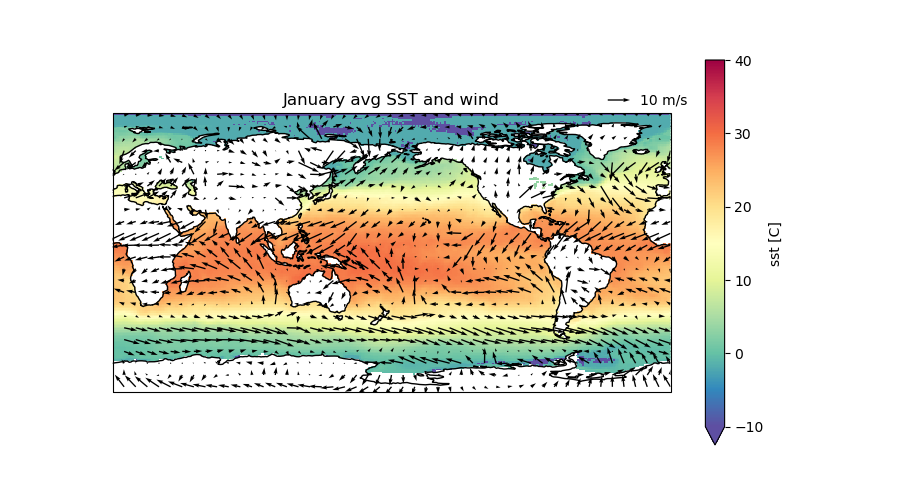

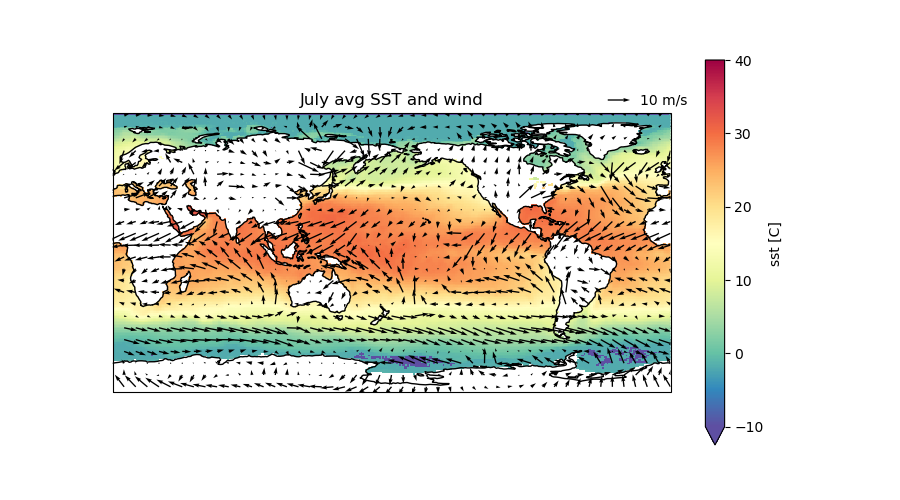

4) Choose 1 El Niño and La Niña years and plot SST anomalies and wind anomalies. Use 
the data below:
[uw wind](http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/Monthlies/gaussian_grid/uw
nd.10m.mon.mean.nc)
[vw wind](http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/Monthlies/gaussian_grid/vw
nd.10m.mon.mean.nc)

Use the same period as in Problem 2 above (1981-2020) for the climatological means. 
You can choose 1 month and plot the anomaly map (e.g. January 1998). Describe the 
west-east SST gradient in the South Pacific and wind speed in both El Niño and La Niña 
cases (15 points).